<a href="https://colab.research.google.com/github/hyelog/2022_Samsung_DL/blob/main/%5BAI_Essential%5D_3%EC%9D%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5_%EC%BD%94%EB%93%9C_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 05. 합성곱신경망 (CNN)

In [ ]:
%%capture
!pip install JAEN -qU

## 05-001 2D 컨볼루션 출력 크기 계산 함수 구현

In [ ]:
def conv2d_output_size(input_size, kernel_size, stride=1, padding=0):
    height, width = input_size

    # Convolution 공식 적용
    out_height = (height + 2 * padding - kernel_size) // stride + 1
    out_width = (width + 2 * padding - kernel_size) // stride + 1

    return out_height, out_width

## 05-002 컨볼루션 출력 크기 계산

In [ ]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 1, 0)
print(f"Output feature map size: {output_size}")

Output feature map size: (26, 26)


## 05-003 패딩을 포함한 컨볼루션 출력 크기 계산

In [ ]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 1, 1)
print(f"Output feature map size: {output_size}")

Output feature map size: (28, 28)


## 05-004 스트라이드를 포함한 컨볼루션 출력 크기 계산

In [ ]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 2, 0)
print(f"Output feature map size: {output_size}")

Output feature map size: (13, 13)


## 05-005 스트라이드 및 패딩을 포함한 컨볼루션 출력 크기 계산

In [ ]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 2, 1)
print(f"Output feature map size: {output_size}")

Output feature map size: (14, 14)


## 05-006 PyTorch 및 관련 모듈 임포트와 device 설정

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchinfo import summary
from JAEN.utils import plot_training_results

# device 설정 (GPU가 사용 가능하면 GPU로, 그렇지 않으면 CPU 사용)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## 05-007 FashionMNIST 데이터 변환 및 정규화

In [ ]:
# FashionMNIST 데이터 변환 (이미지를 텐서로 변환하고 [0, 1] 범위로 정규화)
transform = transforms.Compose([
    transforms.ToTensor(),
])

## 05-008 FashionMNIST 학습 및 테스트 데이터셋 로드

In [ ]:
# 학습 및 테스트 데이터셋 로드
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.0MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 173kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.20MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 20.1MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



## 05-009 데이터 로더 생성

In [ ]:
# 데이터 로더 생성
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

## 05-010 CNN 모델 클래스 정의

In [ ]:
# Sequential로 모델 정의
model = nn.Sequential(
    # 첫 번째 Conv + ReLU + MaxPool
    nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    # 두 번째 Conv + ReLU + MaxPool
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    # Flatten
    nn.Flatten(),

    # 첫 번째 Fully Connected + ReLU
    nn.Linear(32 * 7 * 7, 128),
    nn.ReLU(),

    # 두 번째 Fully Connected (출력층)
    nn.Linear(128, 10)
)
model = model.to(device)
summary(model, input_size=(64, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [64, 10]                  --
├─Conv2d: 1-1                            [64, 16, 28, 28]          160
├─ReLU: 1-2                              [64, 16, 28, 28]          --
├─MaxPool2d: 1-3                         [64, 16, 14, 14]          --
├─Conv2d: 1-4                            [64, 32, 14, 14]          4,640
├─ReLU: 1-5                              [64, 32, 14, 14]          --
├─MaxPool2d: 1-6                         [64, 32, 7, 7]            --
├─Flatten: 1-7                           [64, 1568]                --
├─Linear: 1-8                            [64, 128]                 200,832
├─ReLU: 1-9                              [64, 128]                 --
├─Linear: 1-10                           [64, 10]                  1,290
Total params: 206,922
Trainable params: 206,922
Non-trainable params: 0
Total mult-adds (M): 79.17
Input size (MB): 0.20
Forward/backward pass 

In [ ]:
# CNN 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        # 첫 번째 컨볼루션 레이어
        # 입력 채널: 1 (흑백 이미지), 출력 채널: 16, 커널 크기: 3x3, 패딩: 1
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)

        # 두 번째 컨볼루션 레이어
        # 입력 채널: 16, 출력 채널: 32, 커널 크기: 3x3, 패딩: 1
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)

        # MaxPool 레이어 (다운샘플링)
        # 커널 크기: 2x2, 스트라이드: 2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # 첫 번째 완전 연결 (Fully Connected) 레이어
        # 입력 크기: 32 * 7 * 7 (Conv2d 출력을 펼친 크기), 출력 크기: 128
        self.fc1 = nn.Linear(32 * 7 * 7, 128)

        # 두 번째 완전 연결 레이어
        # 입력 크기: 128, 출력 크기: 10 (클래스 개수)
        self.fc2 = nn.Linear(128, 10)

        # 활성화 함수
        self.relu = nn.ReLU()

    def forward(self, x):
        # 입력 데이터 크기: (batch_size, 1, 28, 28)

        # 첫 번째 Conv + ReLU + MaxPool
        # Conv 후 크기: (batch_size, 16, 28, 28)
        # MaxPool 후 크기: (batch_size, 16, 14, 14)
        x = self.pool(self.relu(self.conv1(x)))

        # 두 번째 Conv + ReLU + MaxPool
        # Conv 후 크기: (batch_size, 32, 14, 14)
        # MaxPool 후 크기: (batch_size, 32, 7, 7)
        x = self.pool(self.relu(self.conv2(x)))

        # Flatten: Conv 출력을 1차원 벡터로 펼침
        # Flatten 후 크기: (batch_size, 32 * 7 * 7)
        x = x.reshape(-1, 32 * 7 * 7)

        # 첫 번째 Fully Connected + ReLU
        # 출력 크기: (batch_size, 128)
        x = self.relu(self.fc1(x))

        # 두 번째 Fully Connected (출력층)
        # 출력 크기: (batch_size, 10)
        x = self.fc2(x)

        return x

# 모델 요약 출력
model = CNN().to(device)
summary(model, input_size=(64, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [64, 10]                  --
├─Conv2d: 1-1                            [64, 16, 28, 28]          160
├─ReLU: 1-2                              [64, 16, 28, 28]          --
├─MaxPool2d: 1-3                         [64, 16, 14, 14]          --
├─Conv2d: 1-4                            [64, 32, 14, 14]          4,640
├─ReLU: 1-5                              [64, 32, 14, 14]          --
├─MaxPool2d: 1-6                         [64, 32, 7, 7]            --
├─Linear: 1-7                            [64, 128]                 200,832
├─ReLU: 1-8                              [64, 128]                 --
├─Linear: 1-9                            [64, 10]                  1,290
Total params: 206,922
Trainable params: 206,922
Non-trainable params: 0
Total mult-adds (M): 79.17
Input size (MB): 0.20
Forward/backward pass size (MB): 9.70
Params size (MB): 0.83
Estimated Total Size (MB): 10.7

## 05-011 손실 함수 및 옵티마이저 설정과 학습 수행

In [ ]:
def train(model, train_loader, criterion, optimizer, device):
    model.train()  # 모델을 학습 모드로 설정

    running_loss = 0.0 # 미니 배치별 loss값을 누적할 변수

    for datas, labels in train_loader: # 미니 배치 별 파라미터 업데이트 수행
        datas, labels = datas.to(device), labels.to(device) # 미니 배치별 데이터와 레이블 장치 할당

        # 순전파
        outputs = model(datas)

        # 손실 계산
        loss = criterion(outputs, labels)

        # 기울기 초기화
        optimizer.zero_grad()

        # 역전파
        loss.backward()

        # 파라미터 업데이트
        optimizer.step()

        # 손실 누적
        running_loss += loss.item()

    # 현재 Epoch의 평균 손실 값 계산 및 반환
    return running_loss / len(train_loader)

In [ ]:
# 평가 함수 정의
def evaluate(model, test_loader, criterion, device):
    model.eval()  # 모델을 평가 모드로 설정

    running_loss = 0.0 # 미니 배치별 loss값을 누적할 변수


    with torch.no_grad():  # 평가 중에는 기울기 계산을 하지 않음
        for datas, labels in test_loader: # 미니 배치 별 손실 계산
            datas, labels = datas.to(device), labels.to(device) # 미니 배치별 데이터와 레이블 장치 할당

            # 순전파
            outputs = model(datas)

            # 손실 계산
            loss = criterion(outputs, labels)

            # 손실 누적
            running_loss += loss.item()


    # 현재 Epoch의 평균 손실 값 계산 및 반환
    return running_loss / len(test_loader)

In [ ]:
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adam 옵티마이저

train_losses = []
test_losses = []

# 학습 횟수 만큼 반복
for epoch in range(10):

    # 모델 학습(학습데이터)
    train_loss = train(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    # 모델 평가 (평가데이터)
    test_loss = evaluate(model, test_loader, criterion, device)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1} Train Loss : {train_loss} Test Loss : {test_loss}')

RuntimeError: Given groups=1, weight of size [16, 3, 3, 3], expected input[64, 1, 28, 28] to have 3 channels, but got 1 channels instead

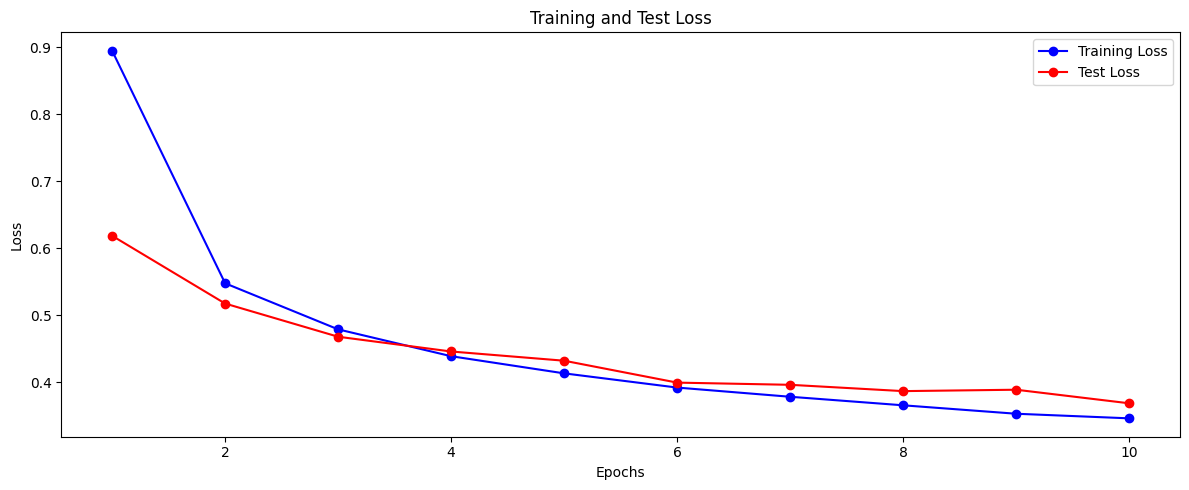

In [ ]:
plot_training_results(train_losses, test_losses)

## 연습문제-05-001 (배치, 3, 32, 32)

1.   항목 추가
2.   항목 추가

입력을 받는 CNN 모델 설계 (Sequential 방식)

In [ ]:
# 이 모델은 이미지 분류를 위한 CNN 모델로, 세 개의 합성곱층(Convolutional Layer)과 완전 연결층(Fully Connected Layer)으로 구성됩니다.
# 입력 데이터는 (배치 크기, 3, 32, 32) 형태를 가지며, 다음과 같은 단계로 설계됩니다.
# 1. 첫 번째 합성곱층:
#    - 입력 채널: 3 (RGB 이미지)
#    - 출력 채널: 16
#    - 커널 크기: 3x3
#    - 패딩: 1 (출력 크기가 입력 크기와 동일하게 유지되도록 설정)
#    - 비선형성을 부여하기 위해 ReLU 활성화 함수 추가
#    - 공간 해상도를 축소하기 위해 Max Pooling 레이어 추가 (커널 크기 2x2, 스트라이드 2)
# 2. 두 번째 합성곱층:
#    - 입력 채널: 16
#    - 출력 채널: 32
#    - 커널 크기: 3x3
#    - 패딩: 1
#    - 활성화 함수로 ReLU 적용
#    - Max Pooling 레이어 추가 (커널 크기 2x2, 스트라이드 2)
# 3. 세 번째 합성곱층:
#    - 입력 채널: 32
#    - 출력 채널: 64
#    - 커널 크기: 3x3
#    - 패딩: 1
#    - ReLU 활성화 함수 적용
#    -  Max Pooling 레이어 추가 (커널 크기 2x2, 스트라이드 2)
# 4. Flatten 레이어:
#    - 다차원 텐서를 이차원 텐서로 변환
#    - Conv 레이어와 Max Pooling을 거친 후 (배치 크기, 64, 4, 4) 형태의 텐서를 이차원 텐서로 변환 변환하여 fully connected layer에 입력
# 5. 첫 번째 완전 연결층:
#    - Conv 레이어 출력을 128차원 출력으로 변환
#    - ReLU 활성화 함수 추가
# 6. 최종 출력층:
#    - 10개의 클래스로 분류 (활성화 함수는 분류 목적에 따라 추가 설정 가능)

# 이 모델은 이미지 분류를 위한 CNN 모델로, 세 개의 합성곱층(Convolutional Layer)과 완전 연결층(Fully Connected Layer)으로 구성됩니다.
# 입력 데이터는 (배치 크기, 3, 32, 32) 형태를 가지며, 다음과 같은 단계로 설계됩니다.
# 1. 첫 번째 합성곱층:
#    - 입력 채널: 3 (RGB 이미지)
#    - 출력 채널: 16
#    - 커널 크기: 3x3
#    - 패딩: 1 (출력 크기가 입력 크기와 동일하게 유지되도록 설정)
#    - 비선형성을 부여하기 위해 ReLU 활성화 함수 추가
#    - 공간 해상도를 축소하기 위해 Max Pooling 레이어 추가 (커널 크기 2x2, 스트라이드 2)
# 2. 두 번째 합성곱층:
#    - 입력 채널: 16
#    - 출력 채널: 32
#    - 커널 크기: 3x3
#    - 패딩: 1
#    - 활성화 함수로 ReLU 적용
#    - Max Pooling 레이어 추가 (커널 크기 2x2, 스트라이드 2)
# 3. 세 번째 합성곱층:
#    - 입력 채널: 32
#    - 출력 채널: 64
#    - 커널 크기: 3x3
#    - 패딩: 1
#    - ReLU 활성화 함수 적용
#    -  Max Pooling 레이어 추가 (커널 크기 2x2, 스트라이드 2)
# 4. Flatten 레이어:
#    - 다차원 텐서를 이차원 텐서로 변환
#    - Conv 레이어와 Max Pooling을 거친 후 (배치 크기, 64, 4, 4) 형태의 텐서를 이차원 텐서로 변환 변환하여 fully connected layer에 입력
# 5. 첫 번째 완전 연결층:
#    - Conv 레이어 출력을 128차원 출력으로 변환
#    - ReLU 활성화 함수 추가
# 6. 최종 출력층:
#    - 10개의 클래스로 분류 (활성화 함수는 분류 목적에 따라 추가 설정 가능)

model = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2, padding=0),

    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2, padding=0),

    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2, padding=0),

    nn.Flatten(),
    nn.Linear(64 * 4 * 4, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)


# class CNN2(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv_layers1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)  # 수정: out_channes -> out_channels        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
#         self.conv_layers2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
#         self.conv_layers3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
#         self.flatten = nn.Flatten()
#         self.fc_layers1 = nn.Linear(64 * 4 * 4, 128)
#         self.fc_layers2 = nn.Linear(128, 10)
#         self.relu = nn.ReLU()
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # self.pool로 수정


#     def forward(self, x):
#         x = self.pool(self.relu(self.conv_layers1(x)))
#         x = self.pool(self.relu(self.conv_layers2(x)))
#         x = self.pool(self.relu(self.conv_layers3(x)))
#         x = self.flatten(x)
#         x = self.relu(self.fc_layers1(x))
#         x = self.fc_layers2(x)
#         return x

# # 모델 요약 출력
# model = CNN2().to(device)
summary(model, input_size=(64, 3, 32, 32))



# model2 = nn.Sequential(
#     nn.Conv2d(3, 16, 3, 1, 1), # (B, 3, 32, 32) > (B, 16, 32, 32)
#     nn.ReLU(),
#     nn.MaxPool2d(2, 2),        # (B, 16, 32, 32) > (B, 16, 16, 16)
#     nn.Conv2d(16, 32, 3, 1, 1), # (B, 16, 16, 16) > (B, 32, 16, 16)
#     nn.ReLU(),
#     nn.MaxPool2d(2, 2),         # (B, 32, 16, 16) > (B, 32, 8, 8)
#     nn.Conv2d(32, 64, 3, 1, 1), # (B, 64, 8, 8) > (B, 64, 8, 8)
#     nn.ReLU(),
#     nn.MaxPool2d(2, 2),         # (B, 64, 8, 8) > (B, 64, 4, 4)
#     nn.Flatten(),               # (B, 64, 4, 4) > (B, 1024)
#     nn.Linear(1024, 128),      # (B, 1024) > (B, 128)
#     nn.ReLU(),
#     nn.Linear(128, 10),       # 다중 분류 > 손실함수에 softmax 포함 > 출력층의 활성화함수 지정 X
# )
# summary(model2, input_size=(10, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [64, 10]                  --
├─Conv2d: 1-1                            [64, 16, 32, 32]          448
├─ReLU: 1-2                              [64, 16, 32, 32]          --
├─MaxPool2d: 1-3                         [64, 16, 16, 16]          --
├─Conv2d: 1-4                            [64, 32, 16, 16]          4,640
├─ReLU: 1-5                              [64, 32, 16, 16]          --
├─MaxPool2d: 1-6                         [64, 32, 8, 8]            --
├─Conv2d: 1-7                            [64, 64, 8, 8]            18,496
├─ReLU: 1-8                              [64, 64, 8, 8]            --
├─MaxPool2d: 1-9                         [64, 64, 4, 4]            --
├─Flatten: 1-10                          [64, 1024]                --
├─Linear: 1-11                           [64, 128]                 131,200
├─ReLU: 1-12                             [64, 128]                 --
├─

## 연습문제-05-002 (배치, 3, 224, 224) 입력을 받는 CNN 모델 설계 (Module 방식)

In [ ]:
# CNN 모델 설계 가이드

# 이 모델은 이미지 분류를 위한 CNN 모델로, 네 개의 합성곱층(Convolutional Layer)과 풀링층(Max Pooling Layer),
# 그리고 두 개의 완전 연결층(Fully Connected Layer)으로 구성됩니다.
# 입력 데이터는 (배치 크기, 3, 224, 224) 형태를 가지며, 다음과 같은 단계로 설계됩니다.

# 1. 첫 번째 합성곱층:
#    - 입력 채널: 3 (RGB 이미지)
#    - 출력 채널: 256
#    - 커널 크기: 3x3
#    - 패딩: 1 (출력 크기를 입력 크기와 동일하게 유지)
#    - 활성화 함수: ReLU를 사용하여 비선형성 부여
#    - 첫 번째 풀링층: 커널 크기 2x2, 스트라이드 2를 사용하여 공간 해상도를 절반으로 줄임 (출력 크기: (112, 112))
# 2. 두 번째 합성곱층:
#    - 입력 채널: 256
#    - 출력 채널: 128
#    - 커널 크기: 3x3
#    - 패딩: 1
#    - 활성화 함수: ReLU 사용
#    - 두 번째 풀링층: 커널 크기 2x2, 스트라이드 2를 사용하여 공간 해상도를 절반으로 줄임 (출력 크기: (56, 56))
# 3. 세 번째 합성곱층:
#    - 입력 채널: 128
#    - 출력 채널: 64
#    - 커널 크기: 3x3
#    - 패딩: 1
#    - 활성화 함수: ReLU 사용
#    - 세 번째 풀링층: 커널 크기 2x2, 스트라이드 2를 사용하여 공간 해상도를 절반으로 줄임 (출력 크기: (28, 28))
# 4. 네 번째 합성곱층:
#    - 입력 채널: 64
#    - 출력 채널: 32
#    - 커널 크기: 3x3
#    - 패딩: 1
#    - 활성화 함수: ReLU 사용
#    - 네 번째 풀링층: 커널 크기 2x2, 스트라이드 2를 사용하여 공간 해상도를 절반으로 줄임 (출력 크기: (14, 14))
# 5. Flatten 레이어:
#    - 네 번째 풀링 이후의 다차원 텐서를 이차원 텐서로 변환하여 fully connected layer에 입력
#    - Conv 레이어와 풀링층을 거친 후 (32, 14, 14) 형태의 텐서를 이차원 텐서로 변환
# 6. 첫 번째 완전 연결층:
#    - Conv 레이어 출력을 낮은 차원(256)으로 줄임
#    - 활성화 함수: ReLU 사용
# 7. 두 번째 완전 연결층:
#    - 최종적으로 두 개의 클래스로 분류

class CNN3(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=256, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, padding=0, stride=2)
        self.conv_layer2 = nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, padding=1)

        self.conv_layer3 = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, padding=1)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=32, padding=1, kernel_size=3)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 14 * 14, 256)
        self.fc2 = nn.Linear(256, 2)

    def forward(self, x):
        x = self.pool(self.relu(self.conv_layer1(x)))
        x = self.pool(self.relu(self.conv_layer2(x)))
        x = self.pool(self.relu(self.conv_layer3(x)))
        x = self.pool(self.relu(self.conv_layer4(x)))

        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN3().to(device)
summary(model, input_size=(64, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
CNN3                                     [64, 2]                   --
├─Conv2d: 1-1                            [64, 256, 224, 224]       7,168
├─ReLU: 1-2                              [64, 256, 224, 224]       --
├─MaxPool2d: 1-3                         [64, 256, 112, 112]       --
├─Conv2d: 1-4                            [64, 128, 112, 112]       295,040
├─ReLU: 1-5                              [64, 128, 112, 112]       --
├─MaxPool2d: 1-6                         [64, 128, 56, 56]         --
├─Conv2d: 1-7                            [64, 64, 56, 56]          73,792
├─ReLU: 1-8                              [64, 64, 56, 56]          --
├─MaxPool2d: 1-9                         [64, 64, 28, 28]          --
├─Conv2d: 1-10                           [64, 32, 28, 28]          18,464
├─ReLU: 1-11                             [64, 32, 28, 28]          --
├─MaxPool2d: 1-12                        [64, 32, 14, 14]          --

## 05-012 JAEN 패키지에서 CNN 모델 불러오기

In [ ]:
# JAEN 패키지에서 CNN 모델 가져오기
from JAEN.models import CNNModel

# CNN 모델 불러오기 (pretrained=True)
model = CNNModel(pretrained=True)

# 모델 정보 확인
summary(model, (64, 1, 28, 28))

Pretrained weights loaded successfully on cuda.


Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [64, 10]                  --
├─Sequential: 1-1                        [64, 32, 7, 7]            --
│    └─Conv2d: 2-1                       [64, 16, 28, 28]          160
│    └─ReLU: 2-2                         [64, 16, 28, 28]          --
│    └─Conv2d: 2-3                       [64, 16, 28, 28]          2,320
│    └─ReLU: 2-4                         [64, 16, 28, 28]          --
│    └─MaxPool2d: 2-5                    [64, 16, 14, 14]          --
│    └─Conv2d: 2-6                       [64, 32, 14, 14]          4,640
│    └─ReLU: 2-7                         [64, 32, 14, 14]          --
│    └─Conv2d: 2-8                       [64, 32, 14, 14]          9,248
│    └─ReLU: 2-9                         [64, 32, 14, 14]          --
│    └─MaxPool2d: 2-10                   [64, 32, 7, 7]            --
├─Sequential: 1-2                        [64, 10]                  --
│    

## 05-013 기존 Conv Block 동결

In [ ]:
# 기존 Conv Block 동결
for param in model.conv_layers.parameters():
    param.requires_grad = False

## 05-014 새로운 Fully Connected Block 설정

In [ ]:
# 새로운 Fully Connected Block 설정
model.fc_layers = nn.Sequential(
    nn.Linear(32 * 7 * 7, 64),  # 첫 번째 은닉층
    nn.ReLU(),
    nn.Dropout(p=0.5),           # 드롭아웃 추가
    nn.Linear(64, 10)           # 출력층 (활성화 함수 없음)
)

# 디바이스 설정 (GPU 또는 CPU)
model = model.to(device)
summary(model, input_size=(64, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [64, 10]                  --
├─Sequential: 1-1                        [64, 32, 7, 7]            --
│    └─Conv2d: 2-1                       [64, 16, 28, 28]          (160)
│    └─ReLU: 2-2                         [64, 16, 28, 28]          --
│    └─Conv2d: 2-3                       [64, 16, 28, 28]          (2,320)
│    └─ReLU: 2-4                         [64, 16, 28, 28]          --
│    └─MaxPool2d: 2-5                    [64, 16, 14, 14]          --
│    └─Conv2d: 2-6                       [64, 32, 14, 14]          (4,640)
│    └─ReLU: 2-7                         [64, 32, 14, 14]          --
│    └─Conv2d: 2-8                       [64, 32, 14, 14]          (9,248)
│    └─ReLU: 2-9                         [64, 32, 14, 14]          --
│    └─MaxPool2d: 2-10                   [64, 32, 7, 7]            --
├─Sequential: 1-2                        [64, 10]                  

## 05-015 손실 함수 및 최적화 도구 정의와 학습 수행

In [ ]:
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adam 옵티마이저

train_losses = []
test_losses = []

# 학습 횟수 만큼 반복
for epoch in range(10):

    # 모델 학습(학습데이터)
    train_loss = train(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    # 모델 평가 (평가데이터)
    test_loss = evaluate(model, test_loader, criterion, device)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1} Train Loss : {train_loss} Test Loss : {test_loss}')

Epoch 1 Train Loss : 0.9184559824497207 Test Loss : 0.535254947508976
Epoch 2 Train Loss : 0.5580318742024619 Test Loss : 0.4549265488697465
Epoch 3 Train Loss : 0.48623669368308237 Test Loss : 0.4188112210316263
Epoch 4 Train Loss : 0.44850601759483055 Test Loss : 0.39796151087921894
Epoch 5 Train Loss : 0.42214306129384904 Test Loss : 0.38026131575654265
Epoch 6 Train Loss : 0.4029718187254375 Test Loss : 0.37059153132377914
Epoch 7 Train Loss : 0.38900315288160403 Test Loss : 0.3603085174112563
Epoch 8 Train Loss : 0.3751396883938358 Test Loss : 0.3533905357312245
Epoch 9 Train Loss : 0.36324829924335356 Test Loss : 0.34696398732388856
Epoch 10 Train Loss : 0.35765811502298056 Test Loss : 0.34361342763065533


## 05-016 마지막 두 Conv 레이어만 학습하도록 설정

In [ ]:
# 마지막 두 Conv 레이어만 학습하도록 설정
for name, p in model.conv_layers.named_parameters():
    if name in ['5.weight', '5.bias', '7.weight', '7.bias']:
        p.requires_grad = True

## 05-017 손실 함수 및 최적화 도구 정의와 학습 수행

In [ ]:
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adam 옵티마이저

train_losses = []
test_losses = []

# 학습 횟수 만큼 반복
for epoch in range(10):

    # 모델 학습(학습데이터)
    train_loss = train(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    # 모델 평가 (평가데이터)
    test_loss = evaluate(model, test_loader, criterion, device)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1} Train Loss : {train_loss} Test Loss : {test_loss}')

Epoch 1 Train Loss : 0.2562257457993178 Test Loss : 0.2900268730535439
Epoch 2 Train Loss : 0.2526044048654881 Test Loss : 0.28791431754020747
Epoch 3 Train Loss : 0.24866115048464174 Test Loss : 0.2857395520160912
Epoch 4 Train Loss : 0.24415511572793094 Test Loss : 0.2849016143305666
Epoch 5 Train Loss : 0.24020394629665784 Test Loss : 0.28296955155244297
Epoch 6 Train Loss : 0.23411783284501736 Test Loss : 0.2842044304154671
Epoch 7 Train Loss : 0.23164488758439067 Test Loss : 0.2844553275425343
Epoch 8 Train Loss : 0.23067897598721834 Test Loss : 0.28208893815138536
Epoch 9 Train Loss : 0.22569878179349626 Test Loss : 0.2782272859387527
Epoch 10 Train Loss : 0.22397975082685953 Test Loss : 0.27871274133064566


# 06. 순환신경망 (RNN)

In [ ]:
%%capture
!pip install JAEN transformers -qU

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from JAEN.utils import plot_training_results

# device 설정 (GPU가 사용 가능하면 GPU로, 그렇지 않으면 CPU 사용)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

## 06-001 Tokenizer 불러오기


In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

## 06-002 토큰화 실습


In [ ]:
tokenizer("AI Essential")

{'input_ids': [101, 19016, 26768, 102], 'token_type_ids': [0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1]}

## 06-003 토큰화된 텍스트 확인


In [ ]:
tokens = tokenizer.tokenize("AI Essential")
tokens

['AI', 'Essential']

## 06-004 토큰을 ID로 변환


In [ ]:
ids = tokenizer.convert_tokens_to_ids(tokens)
ids

[19016, 26768]

## 06-005 토큰 ID를 텍스트로 디코딩


In [ ]:
tokenizer.decode(ids)

'AI Essential'

## 06-006 임베딩 모듈 생성 및 사용


In [ ]:
import torch
import torch.nn as nn

# 임베딩 모듈 생성 (정수 인덱스 10개, 각 인덱스는 5차원의 벡터로 매핑)
embedding_layer = nn.Embedding(num_embeddings=10, embedding_dim=5)

# 임베딩에 사용할 예시 입력 데이터 (정수 인덱스)
# 여기서 [2, 5, 7]은 단어나 토큰에 해당한다고 가정
input_data = torch.tensor([2, 5, 7])

# 임베딩 레이어에 입력 데이터를 전달하여 벡터 변환
embedded_output = embedding_layer(input_data)

print("입력 데이터 (정수 인덱스):", input_data)
print("임베딩 결과 (벡터):\n", embedded_output)

입력 데이터 (정수 인덱스): tensor([2, 5, 7])
임베딩 결과 (벡터):
 tensor([[ 0.7045,  0.0364, -0.5252,  0.9017, -0.3110],
        [ 0.8818, -0.0704, -0.1269,  0.9743,  0.7110],
        [ 1.3470,  1.6416, -1.3988,  0.1820, -0.5812]],
       grad_fn=<EmbeddingBackward0>)


## 06-007 코퍼스 및 레이블 정의


In [ ]:
corpus = [
    'very good nice quality',
    'stop lying',
    'ugly terrible',
    'excellent work',
    'adorable lovely',
    'bad',
    'great nice'
]
y = torch.FloatTensor([1, 0, 0, 1, 1, 0, 1]).reshape(-1, 1)  # 0: 부정, 1: 긍정

## 06-008 GPT2 토크나이저로 문장 변환


In [ ]:
from transformers import AutoTokenizer

# GPT2 토크나이저 불러오기
tokenizer = AutoTokenizer.from_pretrained(
    'gmteacher/simple-word-tokenizer',
    clean_up_tokenization_spaces=True)
seqs = tokenizer(corpus)['input_ids']
seqs  # 변환된 시퀀스

tokenizer_config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/977 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

[[14, 6, 2, 10], [11, 9], [13, 12], [5, 15], [3, 8], [4], [7, 2]]

## 06-009 토큰 ID를 단어로 복원


In [ ]:
# 시퀀스를 단어로 복원
[tokenizer.decode(seq) for seq in seqs]

['very good nice quality',
 'stop lying',
 'ugly terrible',
 'excellent work',
 'adorable lovely',
 'bad',
 'great nice']

## 06-010 시퀀스를 텐서로 변환하고 패딩


In [ ]:
from torch.nn.utils.rnn import pad_sequence

# 각 시퀀스를 텐서로 변환
seqs = [torch.tensor(seq) for seq in seqs]

# 패딩
x = pad_sequence(seqs, batch_first=True)
x

tensor([[14,  6,  2, 10],
        [11,  9,  0,  0],
        [13, 12,  0,  0],
        [ 5, 15,  0,  0],
        [ 3,  8,  0,  0],
        [ 4,  0,  0,  0],
        [ 7,  2,  0,  0]])

## 06-011 텍스트 분류기 모델 정의


In [ ]:
class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, seq_len, num_class):
        super().__init__()
        # 임베딩 계층 추가
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.flat = nn.Flatten()
        self.fc = nn.Linear(embed_dim*seq_len, num_class)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.embedding(x)
        out = self.flat(out)
        out = self.fc(out)
        out = self.sigmoid(out)
        return out

## 06-012 텍스트 분류기 모델 인스턴스 생성 및 출력 테스트


In [ ]:
torch.manual_seed(0)
# 모델 인스턴스 생성
model = TextClassifier(tokenizer.vocab_size, 2, x.shape[1], 1).to(device)

# 출력 테스트
output = model(x[:1].to(device))
output.shape

torch.Size([1, 1])

## 06-013 장치 적용


In [ ]:
# 장치 적용
x = x.to(device)
y = y.to(device)

In [ ]:
summary(model, input_data=x[:1])

Layer (type:depth-idx)                   Output Shape              Param #
TextClassifier                           [1, 1]                    --
├─Embedding: 1-1                         [1, 4, 2]                 32
├─LSTM: 1-2                              [1, 4, 128]               67,584
├─Linear: 1-3                            [1, 1]                    129
├─Sigmoid: 1-4                           [1, 1]                    --
Total params: 67,745
Trainable params: 67,745
Non-trainable params: 0
Total mult-adds (M): 0.27
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.27
Estimated Total Size (MB): 0.28

## 06-014 모델 학습 및 손실 계산


In [ ]:
loss_fn = nn.BCELoss()  # 손실 함수
optimizer = optim.Adam(model.parameters())  # 최적화 도구(optimizer)

epochs = 30000  # 최대 에폭 지정
results = {'cost':[]}

model.train()  # 학습 모드 설정

for epoch in range(epochs):
    h = model(x)  # 예측 값 생성(추론)
    loss = loss_fn(h, y)  # 손실 계산

    optimizer.zero_grad()  # 미분 값 초기화
    loss.backward()  # 역전파(미분 계산)
    optimizer.step()  # 업데이트 진행

    results['cost'].append(loss.item())

    if epoch % 1000 == 0:
        print(f'epoch: {epoch:4d}, cost: {results["cost"][-1]:.10f}')

epoch:    0, cost: 0.0000000002
epoch: 1000, cost: 0.0000000001
epoch: 2000, cost: 0.0000000001
epoch: 3000, cost: 0.0000000001
epoch: 4000, cost: 0.0000000000
epoch: 5000, cost: 0.0000000000
epoch: 6000, cost: 0.0000000000
epoch: 7000, cost: 0.0000000000
epoch: 8000, cost: 0.0000000000
epoch: 9000, cost: 0.0000000000
epoch: 10000, cost: 0.0000000000
epoch: 11000, cost: 0.0000000000
epoch: 12000, cost: 0.0000000000
epoch: 13000, cost: 0.0000000000
epoch: 14000, cost: 0.0000000000
epoch: 15000, cost: 0.0000000000
epoch: 16000, cost: 0.0000000000
epoch: 17000, cost: 0.0000000000
epoch: 18000, cost: 0.0000000000
epoch: 19000, cost: 0.0000000000
epoch: 20000, cost: 0.0000000000
epoch: 21000, cost: 0.0000000000
epoch: 22000, cost: 0.0000000000
epoch: 23000, cost: 0.0000000000
epoch: 24000, cost: 0.0000000000
epoch: 25000, cost: 0.0000000000
epoch: 26000, cost: 0.0000000000
epoch: 27000, cost: 0.0000000000
epoch: 28000, cost: 0.0000000000
epoch: 29000, cost: 0.0000000000


## 06-015 예측 값을 클래스로 변환


In [ ]:
# 예측 값 생성
h = model(x)

# 예측 값(시그모이드 값)을 클래스로 변환
pred = (h.reshape(-1).detach().cpu() > 0.5).to(torch.float32)

print(f'실제 값: {y.reshape(-1)}')
print(f'예측 값: {pred}')

실제 값: tensor([1., 0., 0., 1., 1., 0., 1.])
예측 값: tensor([1., 0., 0., 1., 1., 0., 1.])


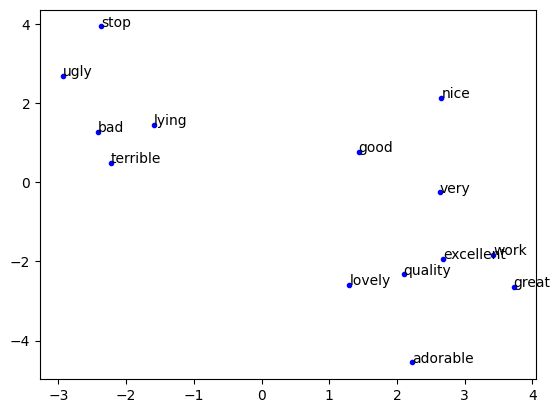

In [ ]:
import matplotlib.pyplot as plt
weights = model.embedding.weight.detach().cpu().numpy()
unique_ids = x.unique().cpu().numpy()

for idx, (d1, d2) in enumerate(weights[unique_ids]):
    if idx == 0:
        continue
    plt.plot(d1, d2, 'b.')
    plt.annotate(tokenizer.decode(unique_ids[idx]), (d1, d2))

## 06-016 코퍼스 및 레이블 정의


In [ ]:
corpus = [
    'very good nice quality',
    'stop lying',
    'ugly terrible',
    'excellent work',
    'adorable lovely',
    'bad',
    'great nice'
]
y = torch.FloatTensor([1, 0, 0, 1, 1, 0, 1]).reshape(-1, 1)  # 0: 부정, 1: 긍정

## 06-017 GPT2 토크나이저로 문장 변환


In [ ]:
from transformers import AutoTokenizer

# GPT2 토크나이저 불러오기
tokenizer = AutoTokenizer.from_pretrained(
    'gmteacher/simple-word-tokenizer',
    clean_up_tokenization_spaces=True)
seqs = tokenizer(corpus)['input_ids']
seqs  # 변환된 시퀀스

[[14, 6, 2, 10], [11, 9], [13, 12], [5, 15], [3, 8], [4], [7, 2]]

## 06-018 토큰 ID를 단어로 복원


In [ ]:
# 시퀀스를 단어로 복원
[tokenizer.decode(seq) for seq in seqs]

['very good nice quality',
 'stop lying',
 'ugly terrible',
 'excellent work',
 'adorable lovely',
 'bad',
 'great nice']

## 06-019 시퀀스를 텐서로 변환하고 패딩


In [ ]:
from torch.nn.utils.rnn import pad_sequence

# 각 시퀀스를 텐서로 변환
seqs = [torch.tensor(seq) for seq in seqs]

# 패딩
x = pad_sequence(seqs, batch_first=True)
x

tensor([[14,  6,  2, 10],
        [11,  9,  0,  0],
        [13, 12,  0,  0],
        [ 5, 15,  0,  0],
        [ 3,  8,  0,  0],
        [ 4,  0,  0,  0],
        [ 7,  2,  0,  0]])

## 06-020 텍스트 분류기 모델 정의


In [ ]:
from torch import nn

class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_size, num_class):
        super().__init__()
        # 임베딩 계층 추가
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_class)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.embedding(x)
        out, _ = self.lstm(out)
        out = self.fc(out[:, -1, :])
        out = self.sigmoid(out)
        return out

## 06-021 텍스트 분류기 모델 인스턴스 생성 및 출력 테스트


In [ ]:
torch.manual_seed(0)

hidden_size = 128
# 모델 인스턴스 생성
model = TextClassifier(tokenizer.vocab_size, 2, hidden_size, 1).to(device)

# 출력 테스트
output = model(x[:1].to(device))
output.shape

torch.Size([1, 1])

## 06-022 장치 적용


In [ ]:
# 장치 적용
x = x.to(device)
y = y.to(device)

## 06-023 모델 학습 및 손실 계산


In [ ]:
loss_fn = nn.BCELoss()  # 손실 함수
optimizer = optim.Adam(model.parameters())  # 최적화 도구(optimizer)

epochs = 30000  # 최대 에폭 지정
results = {'cost':[]}

model.train()  # 학습 모드 설정

for epoch in range(epochs):
    h = model(x)  # 예측 값 생성(추론)
    loss = loss_fn(h, y)  # 손실 계산

    optimizer.zero_grad()  # 미분 값 초기화
    loss.backward()  # 역전파(미분 계산)
    optimizer.step()  # 업데이트 진행

    results['cost'].append(loss.item())

    if epoch % 1000 == 0:
        print(f'epoch: {epoch:4d}, cost: {results["cost"][-1]:.10f}')

epoch:    0, cost: 0.6917895079
epoch: 1000, cost: 0.0000208432
epoch: 2000, cost: 0.0000062807
epoch: 3000, cost: 0.0000028365
epoch: 4000, cost: 0.0000014922
epoch: 5000, cost: 0.0000008461
epoch: 6000, cost: 0.0000005104
epoch: 7000, cost: 0.0000002860
epoch: 8000, cost: 0.0000001666
epoch: 9000, cost: 0.0000000925
epoch: 10000, cost: 0.0000000727
epoch: 11000, cost: 0.0000000388
epoch: 12000, cost: 0.0000000298
epoch: 13000, cost: 0.0000000080
epoch: 14000, cost: 0.0000000052
epoch: 15000, cost: 0.0000000034
epoch: 16000, cost: 0.0000000022
epoch: 17000, cost: 0.0000000014
epoch: 18000, cost: 0.0000000010
epoch: 19000, cost: 0.0000000007
epoch: 20000, cost: 0.0000000004
epoch: 21000, cost: 0.0000000003
epoch: 22000, cost: 0.0000000002
epoch: 23000, cost: 0.0000000001
epoch: 24000, cost: 0.0000000001
epoch: 25000, cost: 0.0000000001
epoch: 26000, cost: 0.0000000000
epoch: 27000, cost: 0.0000000000
epoch: 28000, cost: 0.0000000000
epoch: 29000, cost: 0.0000000000


## 06-024 예측 값을 클래스로 변환


In [ ]:
# 예측 값(시그모이드 값)을 클래스로 변환
pred = (h.reshape(-1).detach().cpu() > 0.5).to(torch.float32)

print(f'실제 값: {y.reshape(-1)}')
print(f'예측 값: {pred}')

실제 값: tensor([1., 0., 0., 1., 1., 0., 1.], device='cuda:0')
예측 값: tensor([1., 0., 0., 1., 1., 0., 1.])


## 연습문제-06-001 10개 문서 유형 분류를 위한 모델 정의 (Module 방식)


In [ ]:
import torch
from torch import nn

# DocumentClassifier 모델 정의
class DocumentClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_size, num_class=10):
        super().__init__()

        # 1. Embedding 계층: 입력된 단어를 고차원 벡터로 변환합니다. vocab_size, embed_dim 사용 (vocab_size: 단어 사전 크기, embed_dim: 임베딩 차원 수)

        # 2. LSTM 계층: 순차적 데이터를 처리하는 LSTM 계층입니다. embed_dim, hidden_size, batch_first=True 사용 (embed_dim 크기의 입력을 받아 hidden_size 크기의 출력을 반환)

        # 3. Fully Connected Layer (FC): LSTM의 출력을 사용해 문서 유형을 분류하는 계층입니다. hidden_size, num_class 사용 (hidden_size에서 10개의 문서 유형으로 분류)

    def forward(self, x):
        # 4. 입력 데이터 > Embedding 계층

        # 5. Embedding 계층 > LSTM 계층

        # 6. LSTM 계층 > FC 계층 (LSTM의 마지막 타임스텝의 출력을 사용해 FC 계층에 전달)

        # 7. 값 반환


model = DocumentClassifier(vocab_size=10000, embed_dim=128, hidden_size=256)
model(torch.randint(0, 10000, (100, 20))).shape